In [1]:
import numpy as np

In [260]:
def sgm(A, B, seeds, hard=True, pad=0, start='barycenter', maxiter=20):
    gamma = 0.1
    nv1 = A.shape[0]
    nv2 = B.shape[0]
    nv = max(nv1, nv2)
    
    if (seeds is None):
        m = 0
        if start == 'barycenter':
            S = np.full((nv, nv), 1/float(nv))
        else:
            return None #Implement rsp function later
        AA = A
        BB = B
    else:
        A_ind = np.concatenate((seeds[:, 0], np.arange(nv1)))
        B_ind = np.concatenate((seeds[:, 1], np.arange(nv2)))
        AA = A[A_ind, A_ind] #Unsure if this is correct
        BB = B[B_ind, B_ind]
        
        m = seeds.shape[0]
        
        if (hard):
            n = nv - m
            if start == 'barycenter':
                S = np.full((n, n), 1/float(n))
            else:
                return None #Implement rsp function later
        else:
            s = m
            m = 0
            if start == 'barycenter':
                diag1 = np.identity(s)
                diag2 = np.full((nv-s, nv-s), 1/float(nv-s))
                offdiag = np.full((0, s), nv-s)
                S = np.concatenate((np.concatenate((diag1,offdiag), axis=1), np.concatenate((np.transpose(offdiag),diag2), axis=1)), axis=0)
            else:
                return None #Implement this functionality later
        
    return sgm_ordered(AA, BB,m,S,pad,maxiter)

def sgm_ordered(A,B,m,start,pad=0,maxiter=20,LAP="exact",verbose=False):
    
    totv1 = A.shape[1]
    totv2 = B.shape[1]
    
    A[A==0] = -1
    B[B==0] = -1
    if (totv1>totv2):
        diff = totv1-totv2
        B = np.concatenate((B, np.full((B.shape[0], diff), pad)), axis=1)
        B = np.concatenate((B, np.full((diff, B.shape[1]), pad)), axis=0)
    elif (totv1<totv2):
        diff = totv2-totv1
        A = np.concatenate((A, np.full((A.shape[0], diff), pad)), axis=1)
        A = np.concatenate((A, np.full((diff, A.shape[1]), pad)), axis=0)
        
    totv = max(totv1,totv2)
    
    n = totv-m
    
    if m == 0:
        A12 = np.zeros((n, n)); A21 = np.zeros((n, n)); B12 = np.zeros((n, n)); B21 = np.zeros((n, n))
    else:
        A12 = A[0:m,m:(m+n)]
        A21 = A[m:(m+n),0:m]
        B12 = B[0:m,m:(m+n)]
        B21 = B[m:(m+n),0:m]
        
    if n == 1:
        A12 = A21 = B12 = B21 = np.transpose(A12)
        
    A22 = A[m:(m+n),m:(m+n)]
    tA22 = np.transpose(A22)
    
    B22 = B[m:(m+n),m:(m+n)]
    tB22 = np.transpose(B22)
        
        
        
        

In [256]:
randm = np.random.random((5, 5))
randm

array([[0.26681073, 0.14775445, 0.58687843, 0.42907662, 0.19824784],
       [0.94750053, 0.25385073, 0.51414579, 0.41209133, 0.9596322 ],
       [0.05956759, 0.67926586, 0.45137383, 0.03395134, 0.1036511 ],
       [0.20370854, 0.99406509, 0.98966643, 0.91154615, 0.40031886],
       [0.82331732, 0.10719204, 0.97951125, 0.79499309, 0.16590546]])

In [262]:
type(list([1,2,3,4]))==list

True

In [25]:
A = np.random.rand(15, 15)
B = np.random.rand(15, 15)
C = np.array([[1,2], [3,4]])
AA, BB, m, S, pad, maxiter = sgm(A, B, C)
print("AA = ", AA)
print("BB = ", BB)
print("m = ", m)
print("S = ", S)
print("pad = ", pad)
print("maxiter = ", maxiter)


AA =  [0.18272557 0.74851707 0.32991428 0.18272557 0.42599817 0.74851707
 0.57432066 0.10577907 0.2773486  0.9240651  0.0656926  0.8091811
 0.97706332 0.48025252 0.91624349 0.06578768 0.13546645]
BB =  [0.57212234 0.05597675 0.86553309 0.63599288 0.57212234 0.57280748
 0.05597675 0.15055442 0.61962477 0.40201633 0.81304293 0.1558302
 0.90683199 0.82136081 0.18635702 0.94172814 0.4332612 ]
m =  2
S =  [[0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
  0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
  0.07692308]
 [0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
  0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
  0.07692308]
 [0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
  0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
  0.07692308]
 [0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
  0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
  0.076923

In [ ]:
# parameters for finding seeds
s = 4 # number of seeds to be used for SGM h <- ell <- 1 # max walk for finding neighborhoods
# parameters for SGM
R = 100 # repeat SGM R times to get averaged P matrix
gamma = 0.1 # number of iterations for the Frank-Wolfe algorithm
mc = 2

m = 5 #|J|=junkonG1
n = 20 # |W| = shared vertices on G1, not including x and S mp <- 0 # |J'| = junk on G2
d = 5 # for RDPG, dimension of the random vectors
corr = 0.5 # for correlated graphs

nV1 <- 1+s+n+m
nV2 <- 1+s+n+mp

# Try 2

Generate figure 6 from the figure becasue this implementation of the alg looks simplist

In [57]:
import numpy as np
from graspologic.plot import heatmap
import igraph
!ls

VN_via_SGM.ipynb fig6_data.npy    g_tst.txt


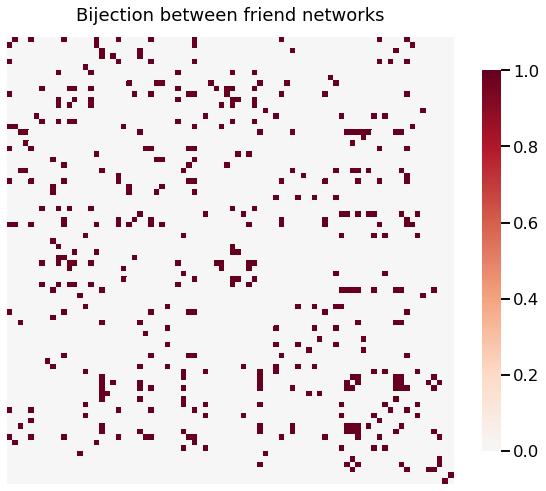

In [52]:
adj_matrix = np.load("fig6_data.npy")
heatmap(adj_matrix, title="Bijection between friend networks")

In [163]:
def permute_adj_matrix(adj_mat):
    assert adj_mat.shape[0] == adj_mat.shape[1]
    indexs = np.random.permutation(np.arange(adj_mat.shape[0]))
    ress = np.zeros(adj_mat.shape)
    for ii, ind in enumerate(indexs):
        ress[ii] = adj_mat[ind][indexs]
    return ress, indexs

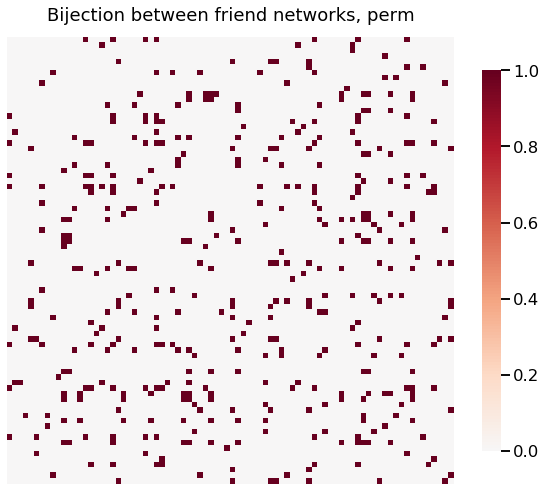

In [56]:
adj_perm = permute_adj_matrix(adj_matrix)
heatmap(adj_perm, title="Bijection between friend networks, perm")

# Reproduce igraph's ego function from R

In [234]:
def ego(graph_adj_matrix, order, node, mindist=1):
    #Note all nodes are zero based in this implementation, i.e the first node is 0
    dists = [[node]]
    for ii in range(1, order+1):
        clst = []
        for nn in dists[-1]:
            clst.extend(list(np.where(graph_adj_matrix[nn]==1)[0]))
        clst = list(set(clst))
        
        #Remove all the ones that are closer (i.e thtat have already been included)
        dists_conglom = []
        for dd in dists:
            dists_conglom.extend(dd)
        dists_conglom = list(set(dists_conglom))
        
        cn_proc = []
        for cn in clst:
            if cn not in dists_conglom:
                cn_proc.append(cn)
        
        dists.append(cn_proc)
    ress = []
        
    for ii in range(mindist, order+1):
        ress.extend(dists[ii])
        
    return list(set(ress))  

def ego_list(graph_adj_matrix, order, node, mindist=1):
    total_res = []
    for nn in node:
        ego_res = ego(graph_adj_matrix, order, node, mindist=1)
        total_res.extend(ego_res)
    return list(set(total_res))

In [138]:
igraph_obj = igraph.load("HSfbgraphcore.txt", format="edges")
igraph_obj.to_undirected()

is_directed =  False
(Num predicted/Num Expected) =  (47, 47)
(Predicted/Expected):  [(1, 1), (2, 2), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (16, 16), (17, 17), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (28, 28), (29, 29), (32, 32), (34, 34), (35, 35), (36, 36), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (45, 45), (46, 46), (48, 48), (49, 49), (51, 51), (55, 55), (59, 59), (60, 60), (63, 63), (65, 65), (69, 69), (71, 71), (74, 74), (75, 75), (77, 77), (81, 81)]


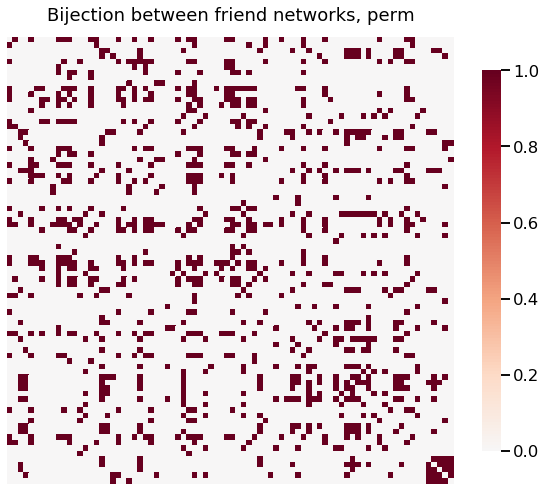

In [144]:
print("is_directed = ", igraph_obj.is_directed())
adj_mat_igraph = igraph_obj.get_adjacency()
nparr = np.array(adj_mat_igraph.data)

heatmap(nparr, title="Bijection between friend networks, perm")
egores = ego(nparr, 2, 26, mindist = 1)
egores.sort()


# Copy and pasted R output from calling ego on HSfbgraphcore
r_output = [1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 21, 22, 23, 24, 25, 26, 28, 29, 32, 34, 35, 36, 39, 40, 41, 42, 43, 45, 46, 48, 49, 51, 55, 59, 60, 63, 65, 69, 71, 74, 75, 77, 81]
r_output.sort()

#Print outputs
print("(Num predicted/Num Expected) = ", (len(egores), len(r_output)))
print("(Predicted/Expected): ", [(ii, jj) for ii, jj in zip([eg + 1 for eg in egores], r_output)]) #Add one to match Rs 1s based language (0 based in my imp)

# Try the vertex nomination alg 

In [238]:
import matplotlib.pyplot as plt
import random

In [241]:
def shuffle_adj_matrix(adj_mat, shuffle_lst):
    assert adj_mat.shape[0] == adj_mat.shape[1]
    ress = np.zeros((len(shuffle_lst), len(shuffle_lst)))
    for ii, ind in enumerate(shuffle_lst):
        ress[ii] = adj_mat[ind][shuffle_lst]
    return ress

def vnsgm(x, seeds, A, B, h, ell, R, g, pad=0, sim=False, verb=False, plotF=False):
    '''
    Parameters
    ----------
    
    x: int or ndarray
        verticies of interest (voi)
    
    seeds: ndarray
        seeds vector
        
    A: ndarray
        Adjacency matrix of `G_1`, the graph where voi is known
        
    B: ndarray
        Adjacency matrix of `G_2`, the graph where voi is not known
        
    h: int
        distance between voi used to create induced subgraph on `G_1`
        
    ell: int 
        distance from seeds to other verts to create induced subgraphs on `G_1`
        
    R: int 
        number of restarts
    
    g: float
        gamma to be used, max tol for alpha, tollerable dist from barycenter
        
    
    
    '''
    
    nv1 = A.shape[0]
    nv2 = A.shape[0]
    
    nv = max(nv1, nv2)
    
    nsx1 = set(range(nv1)).difference(set([seeds[0], x]))
    
    vec = [seeds[0], x]; vec.extend(nsx1)
    
    AA = shuffle_adj_matrix(A, vec)
#     print(AA[:, -10:])


    ns2 = set(range(nv2)).difference(set([seeds[1]])) # <- setdiff(1:nv2,seeds[,2])
    vec2 = [seeds[1]]; vec2.extend(ns2) # <- c(seeds[,2],ns2)
    print(vec2)
    
#     print(B[:, -10:])

    BB = shuffle_adj_matrix(B, vec2)
#     print(BB[:, -10:])

    nrow_seeds = seeds.shape[0]

    S = list(range(nrow_seeds))
    
    voi <- list(range(nrow_seeds, nrow_seeds+2))
    
    P <- vnsgm_ordered(voi,S,AA,BB,h,ell,R,g,pad=pad,sim=sim,verb=verb,plotF=plotF)
    
    return P

def vnsgm_ordered(x,S,A,B,h,ell,R,g,pad=0,sim=True,verb=False,plotF=False):
    '''
    Parameters
    ----------
    
    x: list 
        Verticies of intrerest
        
    S: list
        Vector of seeds
        
    A: ndarray
        `G_1` where voi are known
    
    B: ndarray
        `G_2` where voi unknown
        
    rest same as before
    '''
    s = len(S)
    
    Nh = ego_list(A, h, x, mindist=1) # TODO: make able to take a list in <- unlist(ego(g1,h,nodes=x,mindist=1))
    
    Sx1 = None; Sx2 = None
    
    Sx1 = list(set(Nh).intersection(set(S))); Sx1.sort(); sx = len(Sx1)
    
    Sx2 = list(set(list(range(B.shape[0]))).intersection(set(Sx1))); Sx2.sort(); sx2 = len(Sx2)
               
    case = 'possible' if sx2>0 else 'impossible'
    
    if case == 'possible':
        Cx2 = ego_list(B, ell, Sx2, mindist=1)
        Cx2 = set(Cx2).difference(set(Sx2))
        
        if sim:
            case = np.array(['possible' if _x in Cx2 else 'impossible' for _x in x])
        
        if len(np.where(case == 'possible')[0])>0:
            Nx1 = ego_list(A, ell, Sx1, mindist=0)
            Nx2 = ego_list(B, ell, Sx2, mindist=0)
            
            if sim:
                wxp = np.where(case == 'possible')[0]
                xp = x[wxp]
                
                foo = Sx1; foo.extend(xp)
                ind1 <- Sx1; ind1.extend(x); ind1.extend(set(Nx1).difference(set(foo)))
                
                foo = Sx2; foo.extend(xp)
                ind2 = Sx2; ind2.extend(xp); ind2.extend(set(Nx2).difference(set(foo)))
            else:
                foo = Sx1; foo.extend(x)
                ind1 = Sx1; ind1.extend(x); ind1.extend(set(Nx1).difference(set(foo))) 
                
                ind2 = Sx2; ind2.extend(set(Nx2).difference(set(Sx2)))
                
            if verb:
                print("seed = ", Sx1, ", matching ", ind1, " and ", ind2)
                
            n_iters = 20
            A_s = shuffle_adj_matrix(A, ind1)
            B_s = shuffle_adj_matrix(B, ind2)
            P = multistart_sgm(A, B, R, len(Sx1), g, pad=pad, n_iters=n_iters)
                
                
    else:
        return None
            

def sgm(A,B,seeds,hard=TRUE,pad=0,start="barycenter",maxiter=20):
    gamma = .1
    nv1=A.shape[0]
    nv2=B.shape[0]
    nv 
               
                
def multistart_sgm(A,B,R,s,g,pad=0,n_iters=20):
    n = max(A.shape[0], B.shape[0])
    P = np.zeros((n, n))
    
    for i in range(R):
        M = rsp(n-s, g)
        
        
def rsp(n, g):
    '''
    n: int
        dim of output
        
    g: float
        between 0, 1 upper bound for step `alpha`
    '''
    s = np.random.choice(list(range(n)))
    I = np.identity(n)
    
    P = I[s]
    alpha = np.random.uniform(low=0, high=g)
    
    J = np.ones((n, n))
    
    bc = (1/n)*J
    
    return np.transpose((1-alpha)*bc+alpha*P)
    
    
    
    
    

In [149]:
#define the parameters for the optimization
hhop = 2
ell = 2
g = 0.1
R = 50
n_iter = 20
voi = 27

In [155]:
HSfrgraphcore = igraph.load("HSfrgraphcore.txt", format="edges")
HSfrgraphcore.to_undirected()

In [164]:
adj2a = np.array(HSfrgraphcore.get_adjacency().data)
print(adj2a.shape, type(adj2a))

adj2, perm2  = permute_adj_matrix(adj2a)

(82, 82) <class 'numpy.ndarray'>


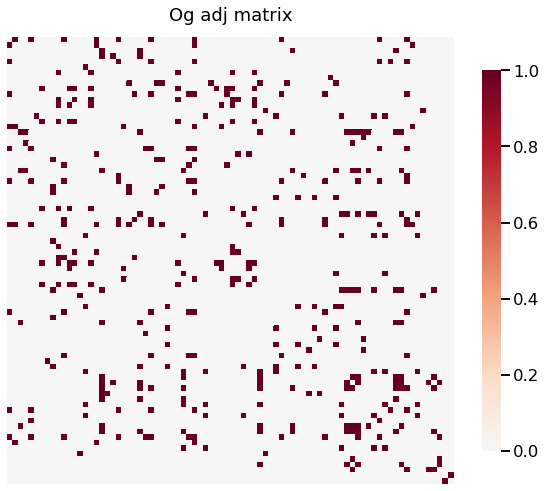

In [165]:
heatmap(adj2a, title="Og adj matrix")

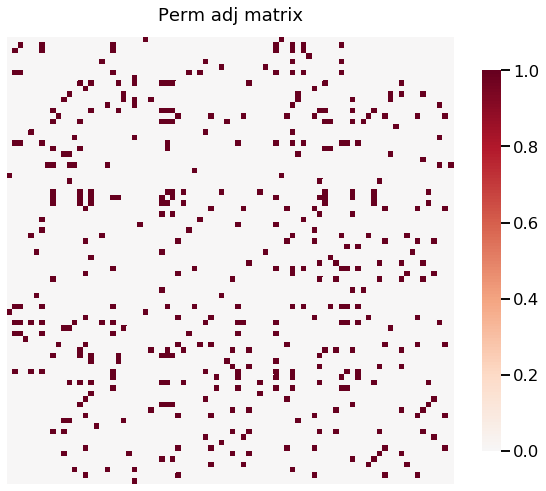

In [166]:
heatmap(adj2, title="Perm adj matrix")

In [179]:
mmp = np.transpose(np.arange(adj2.shape[0]))
mmp = np.transpose(np.stack((mmp, perm2)))

mmp2 = np.transpose(np.arange(adj2.shape[0]))
mmp2 = np.transpose(np.stack((perm2, mmp2)))

In [189]:
sp = [(ii, jj) for ii, jj in zip(perm2, list(range(adj2.shape[0])))]
sp.sort(key = lambda x: x[0])
sp = np.array(sp)

In [190]:
map2sort = mmp2[sp[:,1]]

In [198]:
P = np.diag(list(range(1, adj2.shape[0]+1)))[perm2]-1

In [231]:
for vvi in range(1, adj2.shape[0]+1):
    voi = vvi - 1
    
    fb_voi = map2sort[voi,0]
    fr_voi = map2sort[voi,1]
    
    Nhtmp = ego(adj2a,hhop,voi,mindist=1)
    
    
    imp2 = 0
    nrankxp0 = 0
    nrankxpBad = 0 
    
    nrvois = np.full(len(Nhtmp), None)
    
    imp2_h1l2 = 0
    nrankxp0_h1l2 = 0
    nrankxpBad_h1l2 = 0 
    
    nrvois_h1l2 = np.full(len(Nhtmp), None)
    
    for ii, seed in enumerate(Nhtmp):
        S = map2sort[seed]
        frtmp = fr_voi + (1 if S[1]>fr_voi else 0)
        print(S)
        L = vnsgm(fb_voi, S, adj2a, adj2, hhop, ell, R, g) # L <- localnbd(fb.voi,S,HSfbgraphcore,g.frscrambled,hhop,ell,R,g)
        assert False
    
    
    

[1 4]
[4, 0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0

AssertionError: 

In [206]:
seta = set([1,2,3]); setb = set([3,4,5])
seta.difference(setb)

{1, 2}